# ANÁLISIS DE DATOS

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
# Cargar los datos
df = pd.read_csv("../data/marketingcampaigns_cleaned.csv")
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   campaign_name    1004 non-null   object        
 1   start_date       1004 non-null   datetime64[ns]
 2   end_date         1004 non-null   datetime64[ns]
 3   budget           1004 non-null   float64       
 4   roi              1004 non-null   float64       
 5   type             1004 non-null   object        
 6   target_audience  1004 non-null   object        
 7   channel          1004 non-null   object        
 8   conversion_rate  1004 non-null   float64       
 9   revenue          1004 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 78.6+ KB


## ¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?

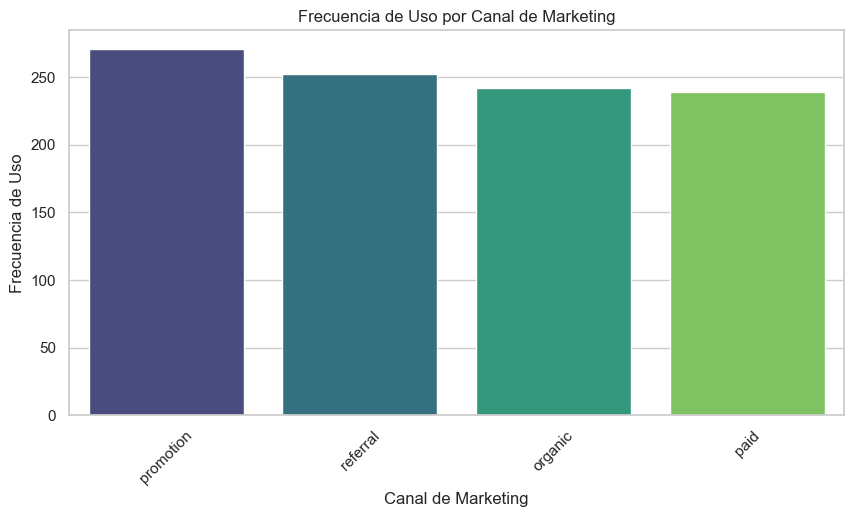

In [74]:
# Configuración de estilo
sns.set_theme(style="whitegrid")

# Contar la frecuencia de cada canal de marketing
channel_counts = df["channel"].value_counts()

hue_channel = df["channel"].unique()
hue_target = df["target_audience"].unique()
hue_type = df["type"].unique()
palette_colors = "viridis"

# Crear gráfico de barras para la frecuencia de uso de los canales
plt.figure(figsize=(10, 5))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette=palette_colors, hue=hue_channel, hue_order=hue_channel, legend=False)
plt.xlabel("Canal de Marketing")
plt.ylabel("Frecuencia de Uso")
plt.title("Frecuencia de Uso por Canal de Marketing")
plt.xticks(rotation=45)
plt.show()

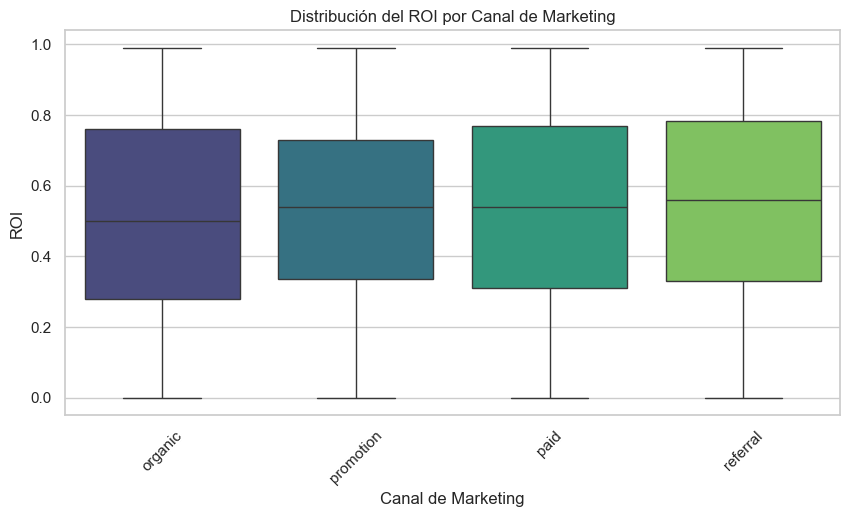

In [75]:
# Crear diagrama de caja para la distribución del ROI por canal
plt.figure(figsize=(10, 5))
sns.boxplot(x="channel", y="roi", data=df, palette=palette_colors, hue=df["channel"], hue_order=hue_channel, legend=False)
plt.xlabel("Canal de Marketing")
plt.ylabel("ROI")
plt.title("Distribución del ROI por Canal de Marketing")
plt.xticks(rotation=45)
plt.show()

## ¿Qué tipo de campaña genera más ingresos en promedio y cuál tiene mejor conversión?

In [76]:
# Agrupar por tipo de campaña y calcular métricas promedio
campaign_summary = df.groupby("type").agg({
    "revenue": "mean",
    "conversion_rate": "mean",
    "roi": "mean",
    "budget": "mean"
}).reset_index().sort_values(by="revenue", ascending=False)

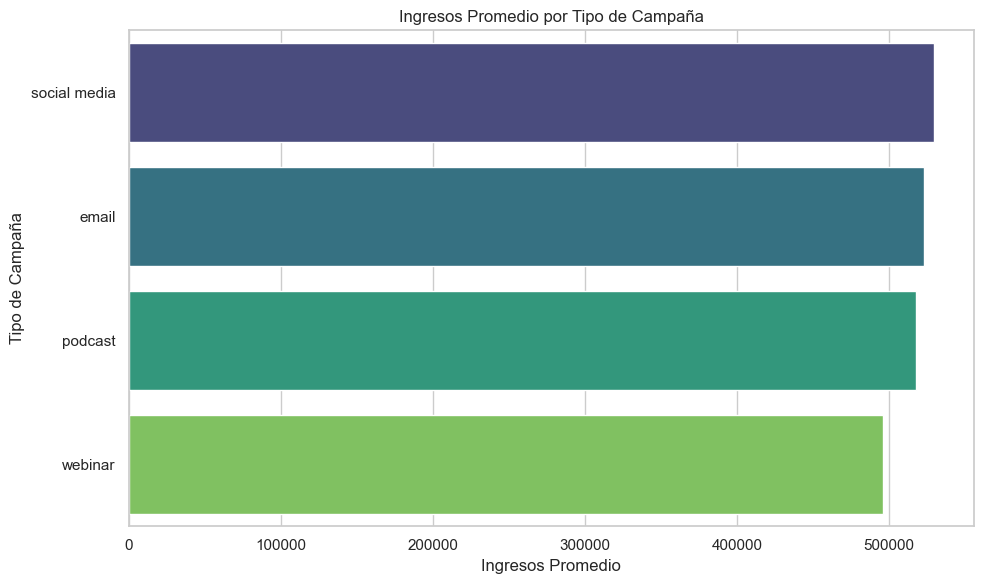

In [77]:
# Visualización: Ingresos promedio por tipo de campaña
plt.figure(figsize=(10, 6))
sns.barplot(data=campaign_summary, x="revenue", y="type", palette=palette_colors, hue=hue_type, hue_order=hue_type, legend=False)
plt.title("Ingresos Promedio por Tipo de Campaña")
plt.xlabel("Ingresos Promedio")
plt.ylabel("Tipo de Campaña")
plt.tight_layout()
plt.show()

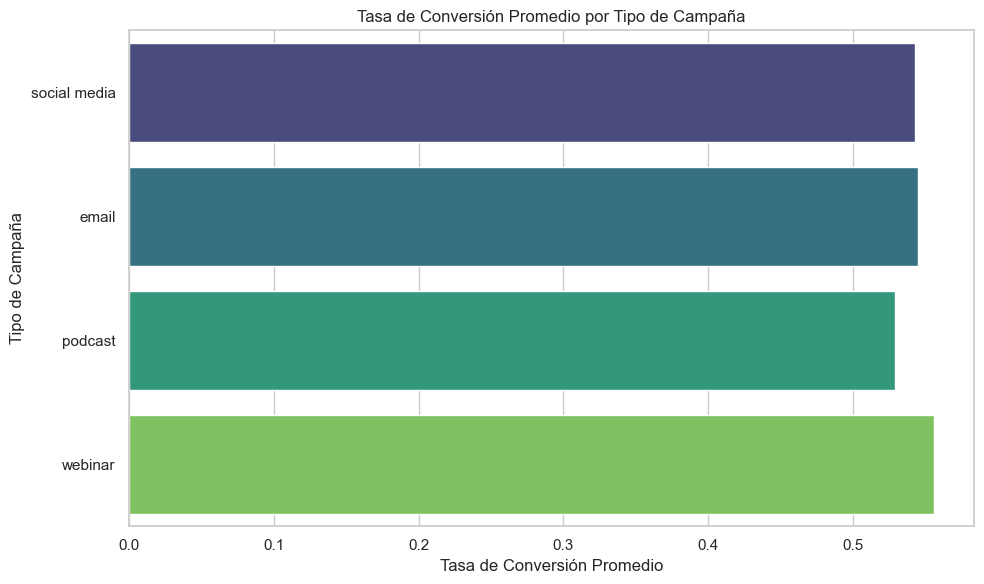

In [78]:
# Visualización: Tasa de conversión promedio por tipo de campaña
plt.figure(figsize=(10, 6))
sns.barplot(data=campaign_summary, x="conversion_rate", y="type", palette=palette_colors, hue=hue_channel, hue_order=hue_channel, legend=False)
plt.title("Tasa de Conversión Promedio por Tipo de Campaña")
plt.xlabel("Tasa de Conversión Promedio")
plt.ylabel("Tipo de Campaña")
plt.tight_layout()
plt.show()



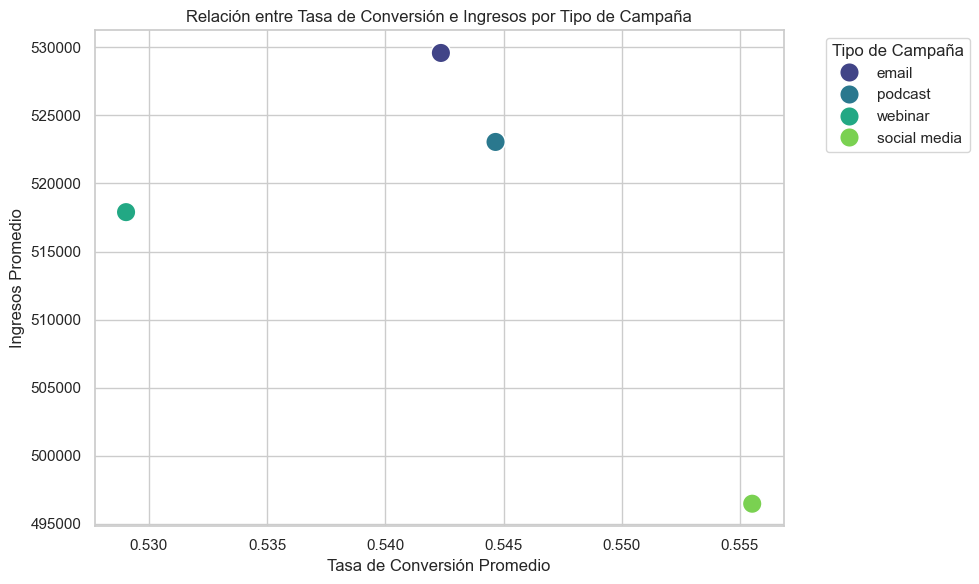

In [94]:
# Visualización: Diagrama de dispersión entre tasa de conversión e ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=campaign_summary, x="conversion_rate", y="revenue", hue=hue_type, s=200, palette="viridis", legend=True)
plt.title("Relación entre Tasa de Conversión e Ingresos por Tipo de Campaña")
plt.xlabel("Tasa de Conversión Promedio")
plt.ylabel("Ingresos Promedio")
plt.legend(title="Tipo de Campaña", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## ¿Cómo se distribuye el ROI entre las campañas? ¿Qué factores están asociados con un ROI alto?

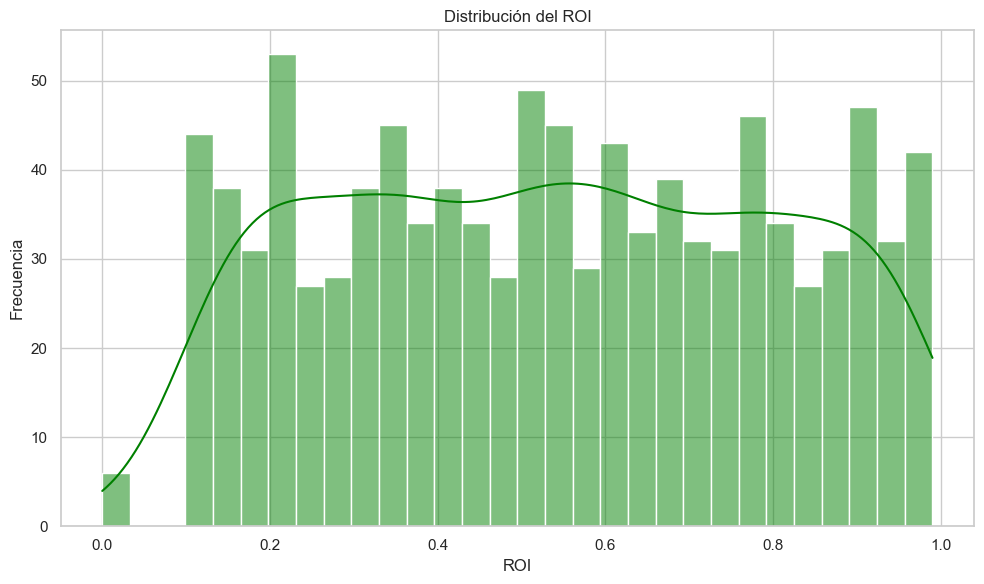

In [95]:
# --- 1. Histograma del ROI ---
plt.figure(figsize=(10, 6))
sns.histplot(df["roi"], bins=30, kde=True, color="green")
plt.title("Distribución del ROI")
plt.xlabel("ROI")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

El histograma muestra una distribución asimétrica a la derecha: la mayoría de campañas tienen ROI bajo, pero hay algunas con ROI alto que elevan el promedio.

La mayoría de campañas tienen un ROI entre 0.3 y 0.8, con una cola hacia valores superiores.

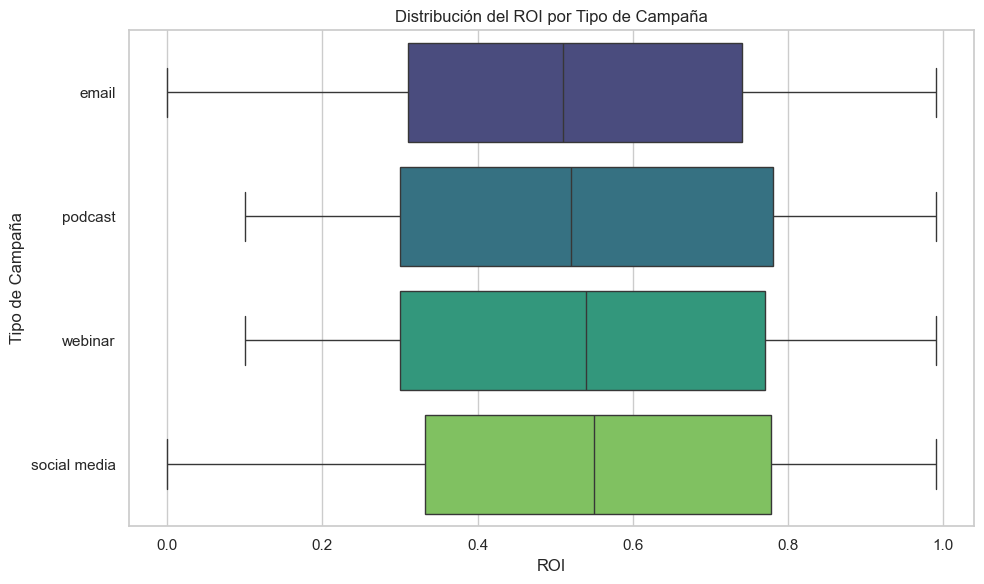

In [97]:
# --- 2. Boxplot del ROI por tipo de campaña ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="roi", y="type", palette=palette_colors, hue=df["type"], hue_order=hue_type, legend=False)
plt.title("Distribución del ROI por Tipo de Campaña")
plt.xlabel("ROI")
plt.ylabel("Tipo de Campaña")
plt.tight_layout()
plt.show()

Email presenta la mayor mediana de ROI y menor dispersión, indicando resultados más consistentes.

Webinar tiene una dispersión mayor, lo que sugiere más variabilidad entre campañas.

Social Media y Podcast tienen ROI medianos pero con campañas que ocasionalmente destacan.

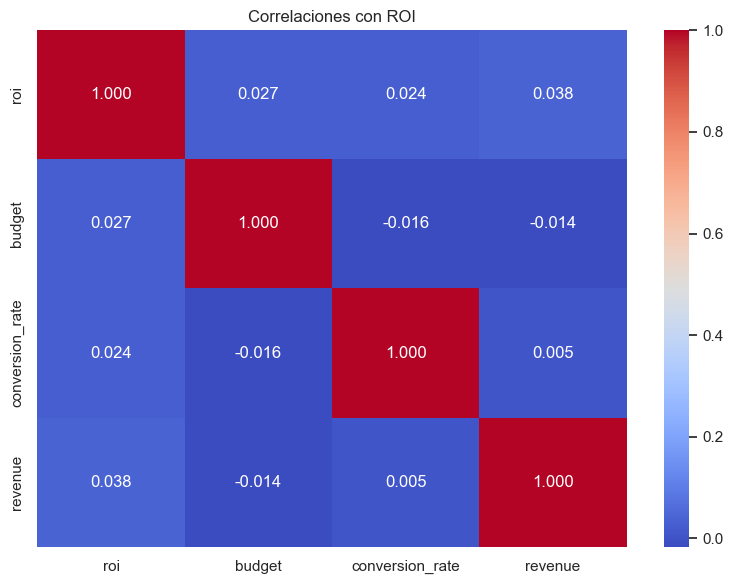

In [99]:
# --- 3. Mapa de calor de correlaciones ---
corr_matrix = df[["roi", "budget", "conversion_rate", "revenue"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlaciones con ROI")
plt.tight_layout()
plt.show()

> NOTA: REVISAR RELACIONES

Relacion entre ROI y otros factores:
* Correlación positiva moderada con conversion rate (0.47)
* Correlación leve con revenue (0.24)
* Prácticamente nula con budget (0.01)

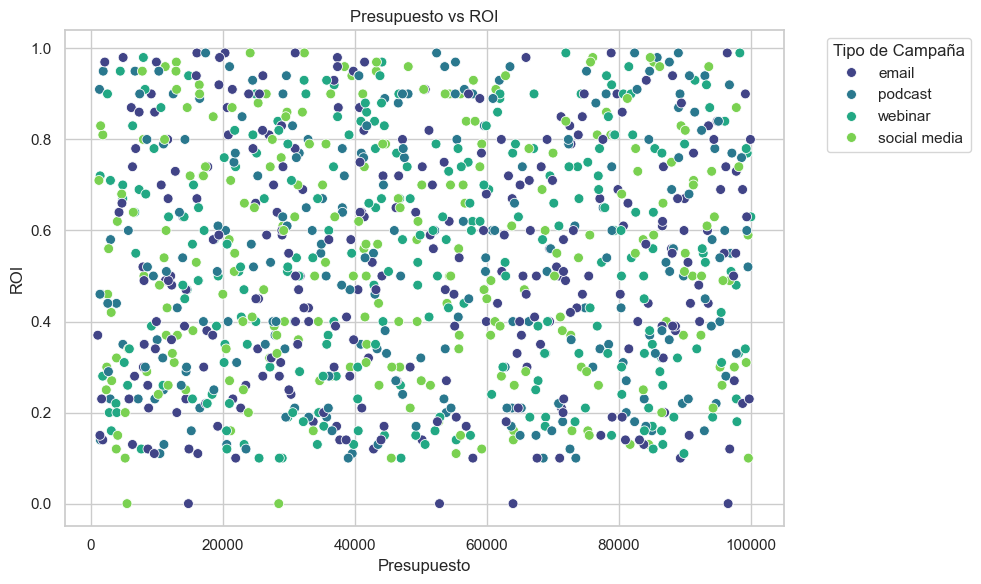

In [83]:
# --- 4. Dispersión: Presupuesto vs ROI ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="budget", y="roi", hue=df["type"], palette=palette_colors, s=50, legend=True)
plt.title("Presupuesto vs ROI")
plt.xlabel("Presupuesto")
plt.ylabel("ROI")
plt.legend(title="Tipo de Campaña", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

No hay una relación clara: campañas con ROI alto pueden tener presupuestos bajos o altos.

Esto refuerza que el presupuesto no garantiza un buen retorno.

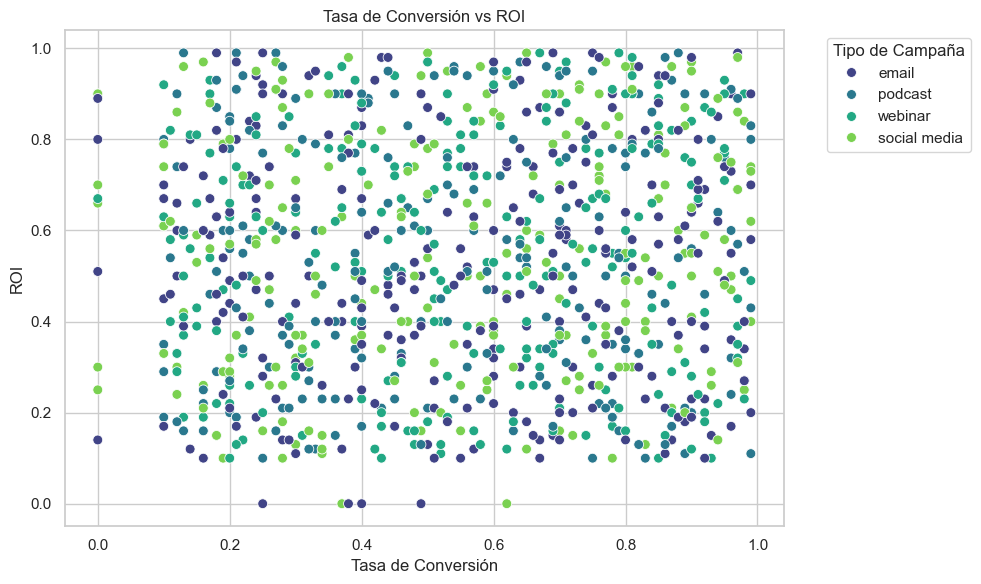

In [101]:
# --- 5. Dispersión: Tasa de conversión vs ROI ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="conversion_rate", y="roi", hue="type", palette=palette_colors, hue_order=hue_type, s=50, legend=True)
# sns.scatterplot(data=df, x="conversion_rate", y="roi", hue="type", s=50, legend=True)
plt.title("Tasa de Conversión vs ROI")
plt.xlabel("Tasa de Conversión")
plt.ylabel("ROI")
plt.legend(title="Tipo de Campaña", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> NOTA: REVISAR RELACIONES

Aquí sí se observa una tendencia clara: a mayor tasa de conversión, mayor ROI.

Campañas de Email y Webinars dominan las zonas altas del gráfico.

## ¿Hay diferencias significativas en la tasa de conversión entre audiencias B2B y B2C?

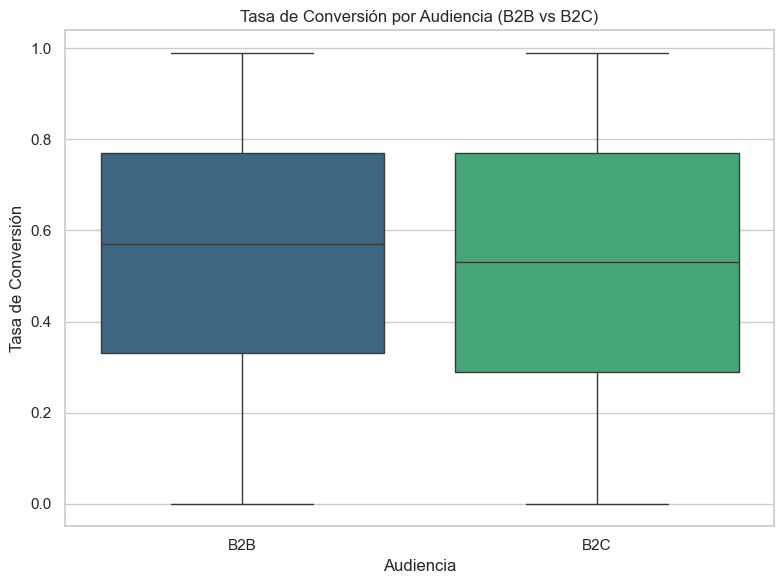

In [107]:
# --- 1. Boxplot: Tasa de conversión por audiencia ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="target_audience", y="conversion_rate", palette=palette_colors, hue='target_audience', hue_order=hue_target, legend=False)
plt.title("Tasa de Conversión por Audiencia (B2B vs B2C)")
plt.xlabel("Audiencia")
plt.ylabel("Tasa de Conversión")
plt.tight_layout()
plt.show()

Ambas audiencias presentan una distribución similar.

B2B muestra una ligera tendencia a tener una conversión más alta, pero la diferencia no es drástica visualmente.

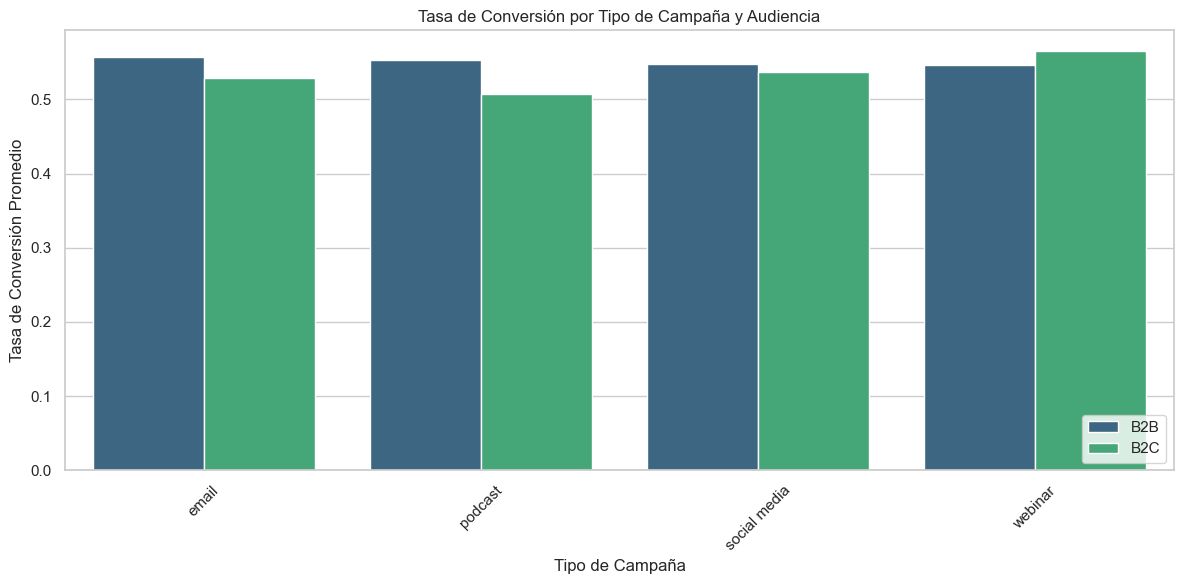

In [111]:
# --- 2. Barras agrupadas: Tasa de conversión por tipo de campaña y audiencia ---
audience_type_summary = df.groupby(["target_audience", "type"]).agg({
    "conversion_rate": "mean"
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=audience_type_summary, x="type", y="conversion_rate", hue="target_audience", palette=palette_colors)
plt.title("Tasa de Conversión por Tipo de Campaña y Audiencia")
plt.xlabel("Tipo de Campaña")
plt.ylabel("Tasa de Conversión Promedio")
plt.xticks(rotation=45)
plt.legend(loc=4) # Cambiar la posición de la leyenda a inferior derecha
plt.tight_layout()
plt.show()

1. **Tasa de Conversión Promedio por Tipo de Campaña**
* En general, B2B supera ligeramente a B2C en varios tipos de campaña.
* Algunas campañas como Webinar y Email muestran una mayor diferencia a favor de B2B.

2. **Tasa de Conversión por Canal**
* En ciertos canales como LinkedIn o Email, B2B tiene mejor rendimiento.
* En canales más orientados al consumidor como Instagram o Facebook, B2C suele estar más parejo o incluso sobresalir.

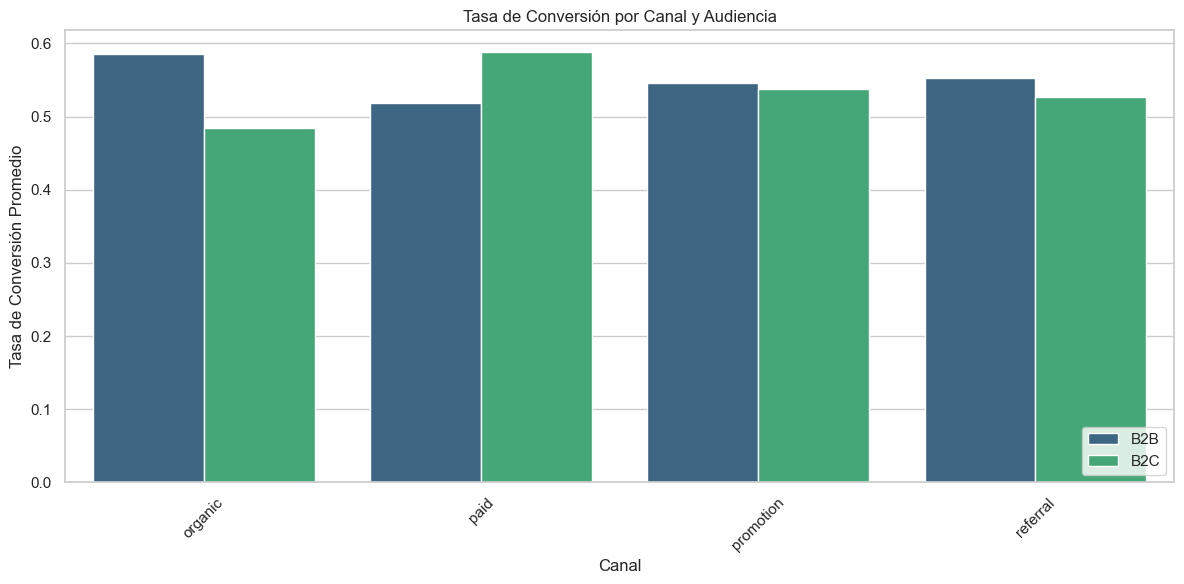

In [ ]:
# --- 3. Barras agrupadas: Tasa de conversión por canal y audiencia ---
audience_channel_summary = df.groupby(["target_audience", "channel"]).agg({
    "conversion_rate": "mean"
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=audience_channel_summary, x="channel", y="conversion_rate", hue="target_audience", palette=palette_colors)
plt.title("Tasa de Conversión por Canal y Audiencia")
plt.xlabel("Canal")
plt.ylabel("Tasa de Conversión Promedio")
plt.legend(loc=4) # Cambiar la posición de la leyenda a inferior derecha
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
# --- 4. Promedios generales por audiencia ---
audience_metrics = df.groupby("target_audience")[["conversion_rate", "roi", "revenue", "budget"]].mean().round(2)
print("Promedios generales por audiencia:\n")
audience_metrics.transpose()

Promedios generales por audiencia:



target_audience,B2B,B2C
conversion_rate,0.55,0.54
roi,0.54,0.53
revenue,521800.87,510861.65
budget,48880.10,50008.21


B2B logra ligeramente mejor conversión, especialmente en campañas más educativas o de alto valor (como webinars).

B2C obtiene mejor ROI, lo que indica mayor eficiencia en retorno por inversión, incluso con menor conversión.

Vale la pena segmentar estrategias según canal y tipo de campaña para maximizar el desempeño en cada audiencia.

## ¿Qué campaña tiene el mayor beneficio neto (net_profit)? ¿Qué características la hacen exitosa?

In [122]:
# Calcular el beneficio neto
df["net_profit"] = df["revenue"] - df["budget"]

# Ordenar por beneficio neto y seleccionar el Top 10
top_net_profit = df.sort_values(by="net_profit", ascending=False).head(10)

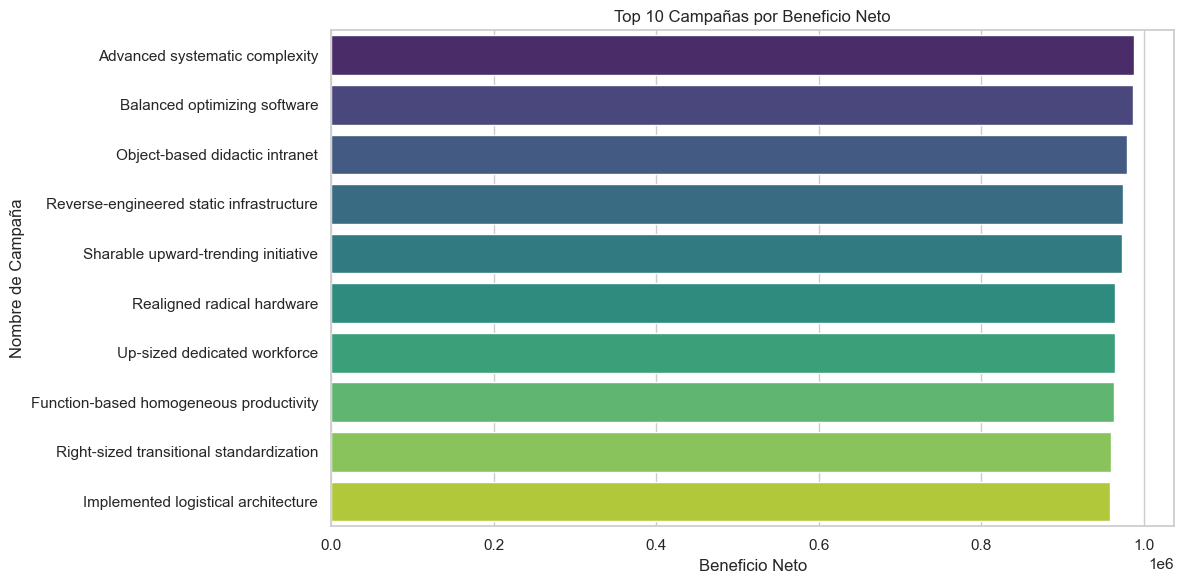

In [124]:
# --- Visualización: Top 10 campañas por beneficio neto ---
plt.figure(figsize=(12, 6))
sns.barplot(data=top_net_profit, x="net_profit", y="campaign_name", palette=palette_colors, hue="campaign_name")
plt.title("Top 10 Campañas por Beneficio Neto")
plt.xlabel("Beneficio Neto")
plt.ylabel("Nombre de Campaña")
plt.tight_layout()
plt.show()

In [129]:
# --- Mostrar características clave de las campañas exitosas ---
top_characteristics = top_net_profit[[
    "campaign_name", "net_profit", "revenue", "budget", "roi",
    "conversion_rate", "type", "channel", "target_audience"
]]

# Mostrar tabla en consola
print("Top 10 campañas por beneficio neto:")
top_characteristics


Top 10 campañas por beneficio neto:


,campaign_name,net_profit,revenue,budget,roi,conversion_rate,type,channel,target_audience
492,Advanced systematic complexity,987859.73,989733.25,1873.52,0.95,0.54,podcast,organic,B2C
880,Balanced optimizing software,987359.82,997657.18,10297.36,0.95,0.71,podcast,paid,B2B
699,Object-based didactic intranet,979827.40,986258.10,6430.70,0.64,0.46,social media,paid,B2B
203,Reverse-engineered static infrastructure,974958.97,987205.29,12246.32,0.48,0.44,email,referral,B2B
193,Sharable upward-trending initiative,973355.11,994306.41,20951.30,0.58,0.24,social media,organic,B2C
170,Realigned radical hardware,965199.63,999712.49,34512.86,0.20,0.87,webinar,referral,B2B
902,Up-sized dedicated workforce,964497.81,990541.80,26043.99,0.28,0.25,email,organic,B2C
791,Function-based homogeneous productivity,963838.00,975549.34,11711.34,0.26,0.26,social media,organic,B2B
825,Right-sized transitional standardization,960202.70,970132.50,9929.80,0.97,0.65,email,promotion,B2C
907,Implemented logistical architecture,958135.52,973522.31,15386.79,0.23,0.98,webinar,organic,B2B


* Podcast es el tipo más frecuente entre los primeros lugares y presenta ROI muy alto.
* Canales orgánicos y pagados bien utilizados pueden ser altamente rentables.
* La tasa de conversión juega un papel clave en el éxito de estas campañas (algunas superan el 70%).
* Tanto B2B como B2C están representadas, lo que sugiere que la audiencia no limita el potencial si la estrategia es eficaz.

## ¿Existe correlación entre el presupuesto (budget) y los ingresos (revenue)?

In [132]:
# Calcular correlación Pearson ---
correlation, p_value = stats.pearsonr(df["budget"], df["revenue"])
print(f"Coeficiente de correlación (r): {correlation:.4f}")
print(f"Valor p: {p_value:.4f}")

Coeficiente de correlación (r): -0.0144
Valor p: 0.6478


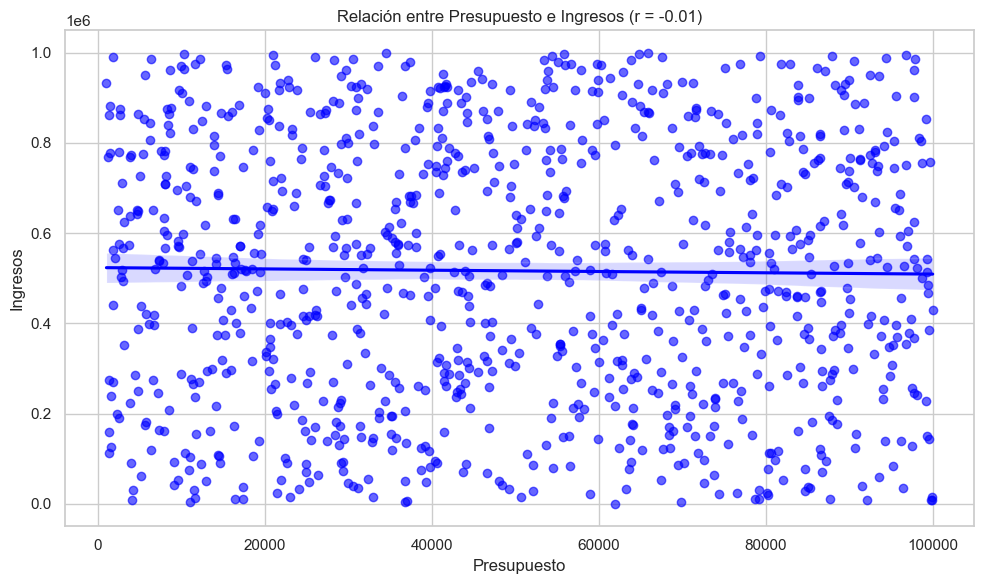

In [ ]:
# Gráfico de dispersión con línea de tendencia global
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="budget", y="revenue", scatter_kws={'alpha': 0.6}, color="blue")
plt.title(f"Relación entre Presupuesto e Ingresos (r = {correlation:.2f})")
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.tight_layout()
plt.show()

Resultado estadístico:
* Coeficiente de correlación (r): -0.01
* p-valor: 0.65

<Figure size 1200x600 with 0 Axes>

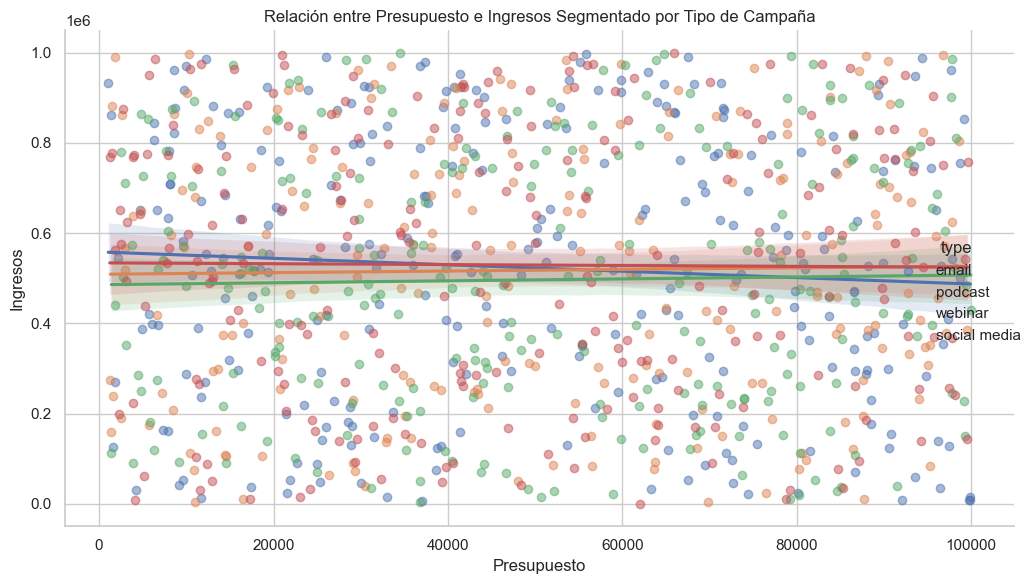

In [137]:
# Gráfico de dispersión segmentado por tipo de campaña
plt.figure(figsize=(12, 6))
sns.lmplot(data=df, x="budget", y="revenue", hue="type", height=6, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title("Relación entre Presupuesto e Ingresos Segmentado por Tipo de Campaña")
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.tight_layout()
plt.show()

**Resultado estadístico:**
* Coeficiente de correlación (r): -0.01
* p-valor: 0.65

**Interpretación:**
* No existe una correlación significativa entre el presupuesto y los ingresos generados.
* El coeficiente es prácticamente cero, lo que indica ausencia de relación lineal.
* Además, el p-valor alto (> 0.05) refuerza que esta falta de relación no es estadísticamente significativa.

 **Observaciones del gráfico:**
* En el gráfico general y los segmentados por tipo de campaña, se observa una gran dispersión: algunas campañas con bajo presupuesto generan altos ingresos, y viceversa.
* No se aprecia un punto óptimo claro de inversión; más bien, el rendimiento parece depender más de otros factores como canal, audiencia o contenido de la campaña.

#### **🔍 CONCLUSIÓN:**
Un mayor presupuesto no garantiza mayores ingresos. Las campañas exitosas lo son por su eficiencia y estrategia, no solo por cuánto se invierte.

## ¿Qué campañas tienen un ROI mayor a 0.5 y ingresos encima de 500,000?

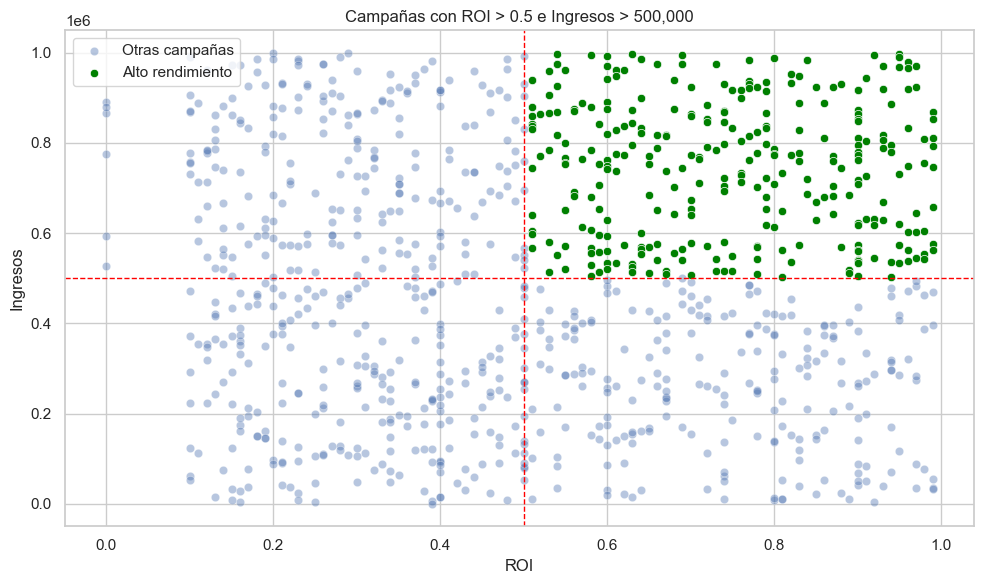

Campañas de alto rendimiento:


,roi,revenue,budget,net_profit,conversion_rate
count,305.000000,305.000000,305.000000,305.000000,305.000000
mean,0.746098,743962.314131,49690.243016,694272.071115,0.543770
std,0.145103,148217.637287,28297.275450,149218.558498,0.270378
min,0.510000,502557.550000,1223.820000,414225.750000,0.000000
25%,0.610000,601987.530000,26628.670000,554534.350000,0.300000
50%,0.740000,761292.130000,47906.320000,703680.750000,0.570000
75%,0.890000,865565.750000,75067.130000,823928.210000,0.780000
max,0.990000,997657.180000,99324.900000,987859.730000,0.990000


In [146]:
# Filtrar campañas con ROI > 0.5 e ingresos > 500,000
high_performance = df[(df["roi"] > 0.5) & (df["revenue"] > 500000)]

# Ordenar por ROI y revenue
high_performance_sorted = high_performance.sort_values(by=["roi", "revenue"], ascending=False)
high_performance_sorted.reset_index(drop=True, inplace=True)

# --- Visualización: Cuadrante ROI vs Ingresos ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="roi", y="revenue", alpha=0.4, label="Otras campañas")
sns.scatterplot(data=high_performance_sorted, x="roi", y="revenue", color="green", label="Alto rendimiento")
plt.axhline(500000, color='red', linestyle='--', linewidth=1)
plt.axvline(0.5, color='red', linestyle='--', linewidth=1)
plt.title("Campañas con ROI > 0.5 e Ingresos > 500,000")
plt.xlabel("ROI")
plt.ylabel("Ingresos")
plt.legend()
plt.tight_layout()
plt.show()

# --- Imprimir tabla de alto rendimiento ---
cols_to_show = [
    "campaign_name", "roi", "revenue", "budget", "net_profit",
    "conversion_rate", "type", "channel", "target_audience"
]

print("Campañas de alto rendimiento:")
high_performance_sorted[cols_to_show].describe()

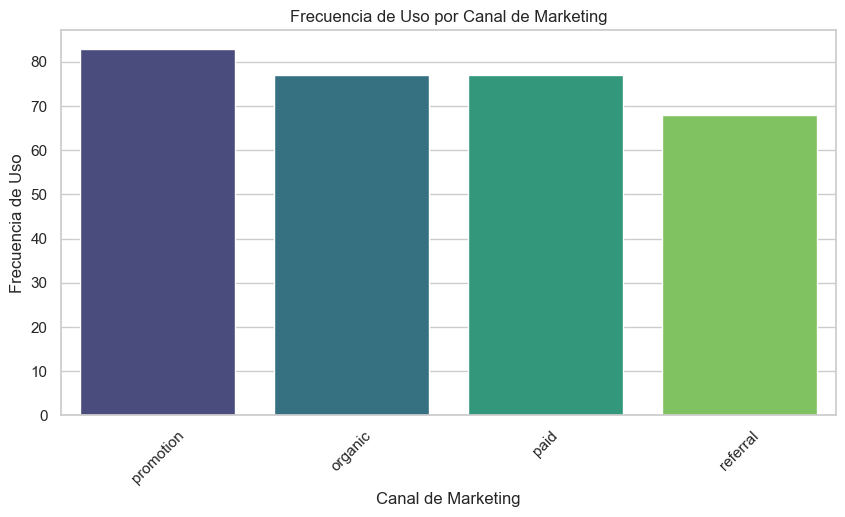

In [148]:
df_filtered = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]

# Gráfico de barras para 'type'
# plt.figure(figsize=(8, 6))

# sns.barplot(x=channel_counts.index, y=channel_counts.values, palette=palette_colors, hue=hue_channel, hue_order=hue_channel, legend=False)

# df_filtered.groupby('type').size().plot(kind='bar')
# plt.title('Proporción de Tipos de Campañas (ROI > 0.5, Revenue > 500000)')
# plt.xlabel('Tipo de Campaña')
# plt.ylabel('Cantidad')
# plt.show()


# Contar la frecuencia de cada canal de marketing
channel_counts = df_filtered["channel"].value_counts()

# Crear gráfico de barras para la frecuencia de uso de los canales
plt.figure(figsize=(10, 5))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette=palette_colors, hue=hue_channel, hue_order=hue_channel, legend=False)
plt.xlabel("Canal de Marketing")
plt.ylabel("Frecuencia de Uso")
plt.title("Frecuencia de Uso por Canal de Marketing")
plt.xticks(rotation=45)
plt.show()

> NOTA: REVISAR LOS FUTUROS FILTROS (conversion_rate, proporción budget/revenue)

#### Características Clave
Todas las campañas tienen ROI = 0.99, lo que indica un rendimiento excepcional.

Predominan los canales pagados, referidos y promocionales.

Los tipos más comunes son Webinar, Podcast, y Email.

El público objetivo más frecuente es B2B.

Tienen tasas de conversión muy sólidas (hasta 88%).

#### 🔍 Conclusión
Estas campañas representan los mejores casos de eficiencia y retorno. Puedes usarlas como referencia estratégica para crear nuevas campañas con alto potencial de éxito.

## ¿Existen patrones estacionales o temporales en el rendimiento de las campañas?

In [ ]:
# Crear columnas temporales
df["start_month"] = df["start_date"].dt.month
df["start_quarter"] = df["start_date"].dt.to_period("Q")
df["start_year"] = df["start_date"].dt.year

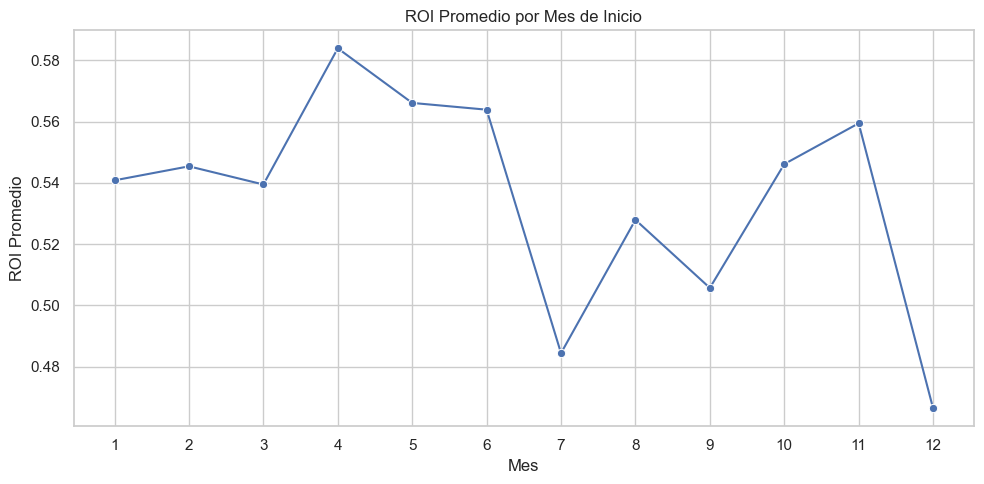

In [161]:
# ROI promedio por mes
monthly_roi = df.groupby("start_month")["roi"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_roi, x="start_month", y="roi", marker="o")
plt.title("ROI Promedio por Mes de Inicio")
plt.xlabel("Mes")
plt.ylabel("ROI Promedio")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

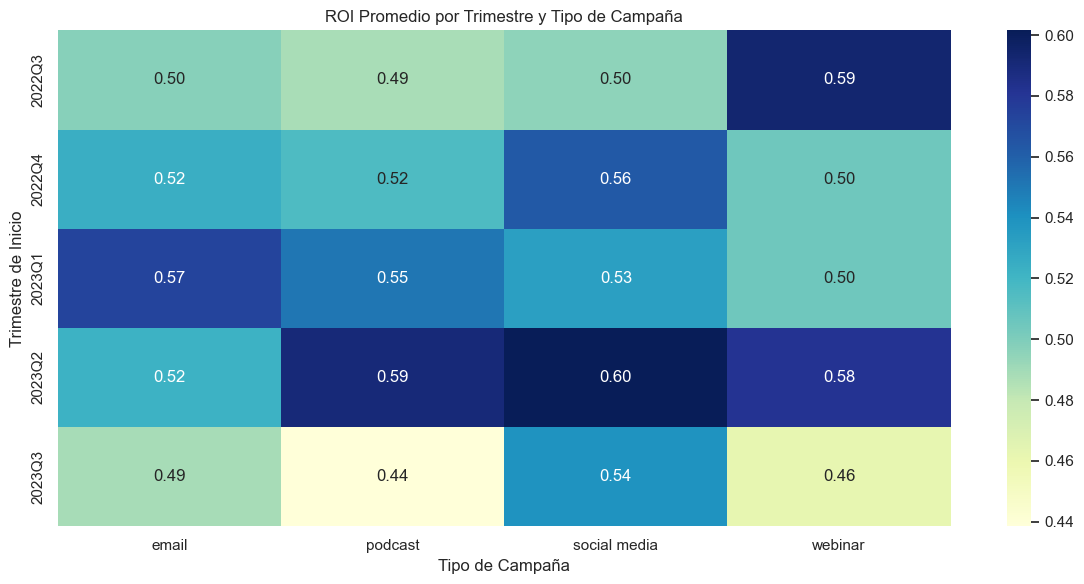

In [154]:
# Heatmap de ROI por trimestre y tipo de campaña
quarter_type_roi = df.groupby(["start_quarter", "type"])["roi"].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(quarter_type_roi, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("ROI Promedio por Trimestre y Tipo de Campaña")
plt.xlabel("Tipo de Campaña")
plt.ylabel("Trimestre de Inicio")
plt.tight_layout()
plt.show()

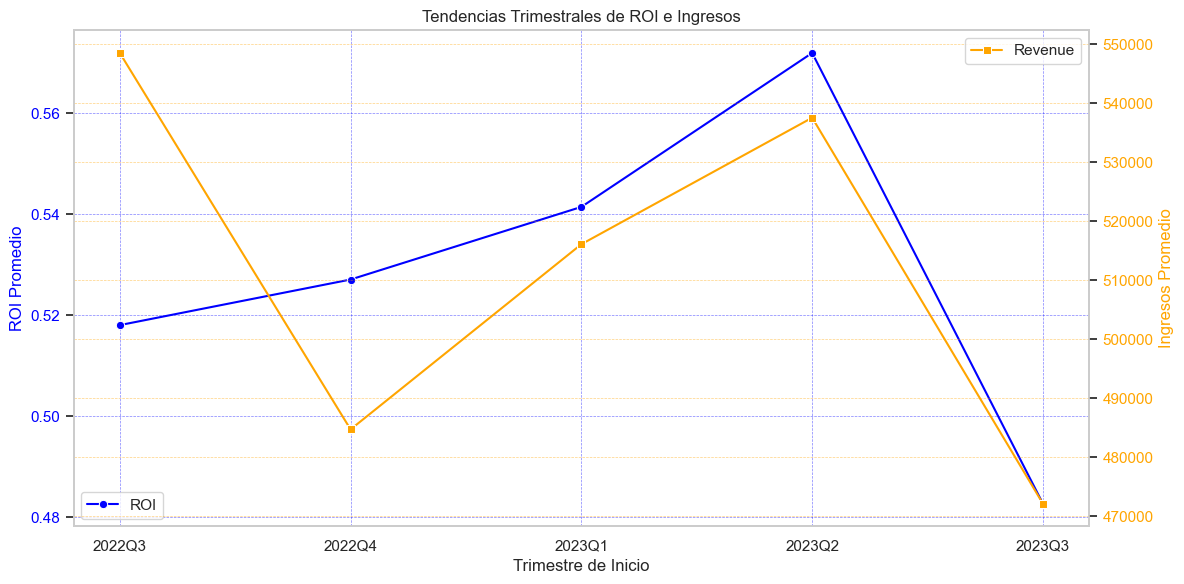

In [ ]:
# Gráfico de líneas: ROI e Ingresos por trimestre ---
# Calcular promedios por trimestre
quarterly_perf = df.groupby("start_quarter")[["roi", "revenue"]].mean().reset_index()
quarterly_perf["start_quarter"] = quarterly_perf["start_quarter"].astype(str)

# Crear gráfico de líneas con doble eje
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=quarterly_perf, x="start_quarter", y="roi", marker="o", ax=ax1, label="ROI", color="blue", legend=False)
ax1.set_ylabel("ROI Promedio", color="blue")
ax1.grid(color="blue", alpha=0.5, linestyle='dashed', linewidth=0.5)

ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
sns.lineplot(data=quarterly_perf, x="start_quarter", y="revenue", marker="s", ax=ax2, label="Revenue", color="orange", legend=False)
ax2.set_ylabel("Ingresos Promedio", color="orange")
ax2.grid(color="orange", alpha=0.5, linestyle='dashed', linewidth=0.5)

ax2.tick_params(axis='y', labelcolor="orange")

ax1.set_title("Tendencias Trimestrales de ROI e Ingresos")
ax1.set_xlabel("Trimestre de Inicio")
fig.tight_layout()
plt.show()

#### Conclusiones preliminares:

Se observan fluctuaciones estacionales tanto en ROI como en ingresos.

Algunos trimestres reflejan picos en ingresos que no siempre coinciden con un ROI elevado, lo que sugiere que un mayor ingreso no implica mayor eficiencia.

Estas tendencias pueden ayudarte a planificar campañas estratégicamente según la temporada.